In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Predictive: XGBoost Regressor Model

In [24]:
import pandas as pd
import numpy as np

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
import sys
sys.path.insert(0, '../../src')

In [28]:
sales_train = pd.read_parquet('../../data/interim/predictive_sales_train.to_parquet')

In [29]:
sales_train.shape

(47107050, 13)

In [30]:
sales_train_reduce_size = sales_train[sales_train['date'] >= '2014-04-18']

#### We will use `Sales historical data` by creating a new databased, including the avearge of `sales` and `sell_price` of each item_id, store_id, and month.

In [45]:
mean_sales_item_id_month = sales_train_reduce_size.copy()

In [46]:
mean_sales_item_id_month['month'] = mean_sales_item_id_month['date'].dt.month
mean_sales_item_id_month = mean_sales_item_id_month.groupby(['item_id', 'store_id', 'month'])[['sales', 'sell_price']].mean().reset_index()

In [47]:
mean_sales_item_id_month

,item_id,store_id,month,sales,sell_price
0,FOODS_1_001,CA_1,1,0.709677,2.24
1,FOODS_1_001,CA_1,2,0.607143,2.24
2,FOODS_1_001,CA_1,3,0.612903,2.24
3,FOODS_1_001,CA_1,4,0.750000,2.24
4,FOODS_1_001,CA_1,5,0.935484,2.24
...,...,...,...,...,...
365875,HOUSEHOLD_2_516,WI_3,8,0.161290,5.94
365876,HOUSEHOLD_2_516,WI_3,9,0.166667,5.94
365877,HOUSEHOLD_2_516,WI_3,10,0.096774,5.94
365878,HOUSEHOLD_2_516,WI_3,11,0.033333,5.94


In [48]:
mean_sales_item_id_month.to_csv('../../data/mean_sales_item_id_month.csv', index=False)

In [31]:
from features.data_prep import preprocess

In [32]:
df_train, item_id_encoder, dept_id_encoder, store_id_encoder, state_id_encoder, cat_id_encoder = preprocess(sales_train_reduce_size.copy())

### Save the `encoder` in the `models/predictive` folder.

In [9]:
from joblib import dump

dump(item_id_encoder, '../../models/predictive/item_id_encoder.joblib')
dump(dept_id_encoder, '../../models/predictive/dept_id_encoder.joblib')
dump(store_id_encoder, '../../models/predictive/store_id_encoder.joblib')
dump(state_id_encoder, '../../models/predictive/state_id_encoder.joblib')
dump(cat_id_encoder, '../../models/predictive/cat_id_encoder.joblib')

['../../models/predictive/cat_id_encoder.joblib']

In [33]:
del sales_train, sales_train_reduce_size

In [34]:
df_train.dropna(inplace=True)

In [35]:
df_train

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,total_sales,year,month,week_number,day_of_week,ema_total_sales_7,rolling_std_7,ema_total_sales_14,rolling_std_14,ema_total_sales_21,rolling_std_21,ema_total_sales_28,rolling_std_28
35886757,1464,3,1,0,0,1,7.98,7.98,2014,4,169,4,2.491666,3.705864,2.191731,3.657670,2.207374,3.281558,2.243812,3.905125
35886758,1465,3,1,0,0,3,7.98,23.94,2014,4,169,4,7.855026,9.048469,5.137949,6.791804,4.315993,5.752869,3.955606,5.546649
35886759,1466,3,1,0,0,8,0.70,5.60,2014,4,169,4,7.291169,8.822857,5.200409,6.632709,4.439817,5.762625,4.084070,5.534604
35886760,1467,3,1,0,0,0,10.98,0.00,2014,4,169,4,5.468133,8.822857,4.498712,6.632709,4.014014,5.762625,3.767908,5.534604
35886761,1468,3,1,0,0,3,0.58,1.74,2014,4,169,4,4.536006,8.669862,4.127069,6.583069,3.797007,5.722413,3.612235,5.126204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,1432,2,0,9,2,2,2.88,5.76,2015,4,221,5,4.505427,4.360007,3.735331,3.737996,3.413028,4.310902,3.252430,4.083399
47107046,1433,2,0,9,2,0,2.00,0.00,2015,4,221,5,3.379070,4.360007,3.237287,3.835645,3.102753,4.310902,3.028125,4.083399
47107047,1434,2,0,9,2,0,3.98,0.00,2015,4,221,5,2.534303,4.360007,2.805649,3.489595,2.820684,3.416943,2.819289,3.982942
47107048,1435,2,0,9,2,0,1.28,0.00,2015,4,221,5,1.900727,4.360007,2.431562,3.489595,2.564259,3.446735,2.624855,3.982942


In [36]:
sales_test = pd.read_parquet('../../data/interim/predictive_sales_test.to_parquet')

In [37]:
sales_test.shape

(12196000, 13)

In [38]:
df_test = preprocess(sales_test.copy())[0]

In [39]:
del sales_test

In [40]:
df_test

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,total_sales,year,month,week_number,day_of_week,ema_total_sales_7,rolling_std_7,ema_total_sales_14,rolling_std_14,ema_total_sales_21,rolling_std_21,ema_total_sales_28,rolling_std_28
47107050,1437,3,1,0,0,0,8.26,0.00,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107051,1438,3,1,0,0,0,3.97,0.00,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107052,1439,3,1,0,0,0,2.97,0.00,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107053,1440,3,1,0,0,4,4.64,18.56,2015,4,222,6,6.787657,NaN,5.678028,NaN,5.322853,NaN,5.148542,NaN
47107054,1441,3,1,0,0,3,2.88,8.64,2015,4,222,6,7.394827,NaN,6.450802,NaN,6.118357,NaN,5.950017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59303045,1432,2,0,9,2,1,2.98,2.98,2016,5,279,6,7.704812,7.926755,7.145593,15.656819,7.099594,14.069151,7.165416,12.828878
59303046,1433,2,0,9,2,0,2.48,0.00,2016,5,279,6,5.778609,8.221183,6.192847,15.656819,6.454176,14.093327,6.671250,12.828878
59303047,1434,2,0,9,2,2,3.98,7.96,2016,5,279,6,6.323957,7.773278,6.428468,6.302364,6.591069,13.095745,6.760129,12.769022
59303048,1435,2,0,9,2,0,1.28,0.00,2016,5,279,6,4.742967,8.028771,5.571339,6.309204,5.991881,13.095745,6.293913,12.769022


#### Save the `df_train` and `df_test` to `data/processed`

In [17]:
df_train.to_parquet('../../data/processed/predictive_df_train.to_parquet')
df_test.to_parquet('../../data/processed/predictive_df_test.to_parquet')

#### Load the `extract_features_target` function

In [6]:
df_train = pd.read_parquet('../../data/processed/predictive_df_train.to_parquet')
df_test = pd.read_parquet('../../data/processed/predictive_df_test.to_parquet')

In [41]:
from features.data_prep import extract_features_target

In [42]:
X_train, X_test, y_train, y_test = extract_features_target(df_train, df_test, 'total_sales')

In [43]:
del df_train, df_test

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220293, 19)
(11220293,)
(12196000, 19)
(12196000,)


#### Import the XGBRegressor and mean_square_error 

In [45]:
from xgboost import XGBRegressor, plot_importance

In [46]:
xgb = XGBRegressor(objective='reg:tweedie', learning_rate=0.16, max_depth=9, subsample=0.7, colsample_bytree=0.7, n_estimators=100, tree_method='approx')

In [47]:
xgb_model = xgb.fit(X_train, y_train)

#### Save the `xgb_model` in `modeles/predictive`

In [56]:
X_test

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,year,month,week_number,day_of_week,ema_total_sales_7,rolling_std_7,ema_total_sales_14,rolling_std_14,ema_total_sales_21,rolling_std_21,ema_total_sales_28,rolling_std_28
47107050,1437,3,1,0,0,0,8.26,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107051,1438,3,1,0,0,0,3.97,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107052,1439,3,1,0,0,0,2.97,2015,4,222,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107053,1440,3,1,0,0,4,4.64,2015,4,222,6,6.787657,NaN,5.678028,NaN,5.322853,NaN,5.148542,NaN
47107054,1441,3,1,0,0,3,2.88,2015,4,222,6,7.394827,NaN,6.450802,NaN,6.118357,NaN,5.950017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59303045,1432,2,0,9,2,1,2.98,2016,5,279,6,7.704812,7.926755,7.145593,15.656819,7.099594,14.069151,7.165416,12.828878
59303046,1433,2,0,9,2,0,2.48,2016,5,279,6,5.778609,8.221183,6.192847,15.656819,6.454176,14.093327,6.671250,12.828878
59303047,1434,2,0,9,2,2,3.98,2016,5,279,6,6.323957,7.773278,6.428468,6.302364,6.591069,13.095745,6.760129,12.769022
59303048,1435,2,0,9,2,0,1.28,2016,5,279,6,4.742967,8.028771,5.571339,6.309204,5.991881,13.095745,6.293913,12.769022


In [48]:
from joblib import dump

In [49]:
dump(xgb_model, '../../models/predictive/xgb_model_reduce_week_number.joblib')

['../../models/predictive/xgb_model_reduce_week_number.joblib']

In [50]:
y_pred = xgb_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

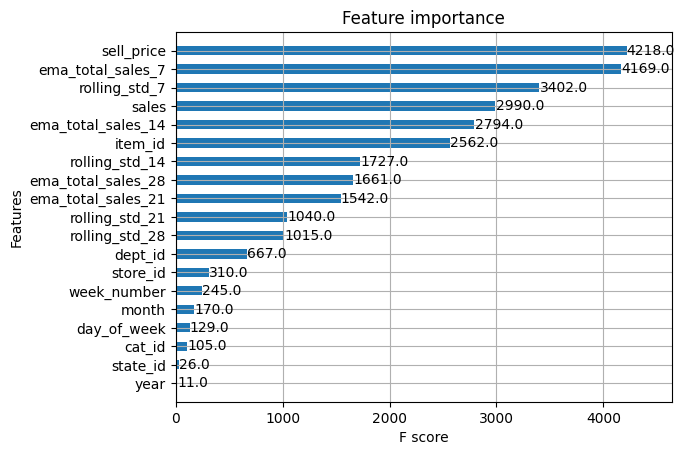

In [51]:
plot_importance(xgb_model, height=0.5)

In [52]:
predicted_total_sales = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
predicted_total_sales

,y_test,y_pred
47107050,0.00,5.924056e-13
47107051,0.00,1.442886e-12
47107052,0.00,5.426650e-12
47107053,18.56,1.771774e+01
47107054,8.64,8.187395e+00
...,...,...
59303045,2.98,3.079911e+00
59303046,0.00,3.017774e-10
59303047,7.96,7.808940e+00
59303048,0.00,3.201369e-10


In [54]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(predicted_total_sales['y_test'], predicted_total_sales['y_pred'], squared=False)
print(rmse)

0.5876248523249437


#### Let's see how our model performed if the `sales historical` data were missing.

In [31]:
from joblib import load
xgb_model = load('../../models/predictive/xgb_model_reduce.joblib')

In [61]:
X_test_missing = X_test.copy()

#### Set the sales_historical data to be `NaN`

In [62]:
X_test_missing.iloc[:, 10:] = np.nan

#### Use the `sales` and `sell_price` value from the created database `mean_sales_item_id_month.csv`

In [63]:
mean_sales_item_id_month = pd.read_csv('../../data/mean_sales_item_id_month.csv')

In [64]:
mean_sales_item_id_month

,item_id,store_id,month,sales,sell_price
0,FOODS_1_001,CA_1,1,0.709677,2.24
1,FOODS_1_001,CA_1,2,0.607143,2.24
2,FOODS_1_001,CA_1,3,0.612903,2.24
3,FOODS_1_001,CA_1,4,0.750000,2.24
4,FOODS_1_001,CA_1,5,0.935484,2.24
...,...,...,...,...,...
365875,HOUSEHOLD_2_516,WI_3,8,0.161290,5.94
365876,HOUSEHOLD_2_516,WI_3,9,0.166667,5.94
365877,HOUSEHOLD_2_516,WI_3,10,0.096774,5.94
365878,HOUSEHOLD_2_516,WI_3,11,0.033333,5.94


In [65]:
item_id_encoder = load('../../models/predictive/item_id_encoder.joblib')
store_id_encoder = load('../../models/predictive/store_id_encoder.joblib')

mean_sales_item_id_month['item_id'] = item_id_encoder.transform(mean_sales_item_id_month['item_id'])
mean_sales_item_id_month['store_id'] = store_id_encoder.transform(mean_sales_item_id_month['store_id'])

In [66]:
merge_df = pd.merge(X_test_missing, mean_sales_item_id_month, on=['item_id', 'store_id', 'month'], how='left')

In [72]:
X_test_missing.reset_index(drop=True, inplace=True)
merge_df.reset_index(drop=True, inplace=True)

In [74]:
X_test_missing['sales'] = merge_df['sales_y']
X_test_missing['sell_price'] = merge_df['sell_price_y']

In [75]:
X_test_missing

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,year,month,day_of_week,ema_sales_7,rolling_std_7,ema_sales_14,rolling_std_14,ema_sales_21,rolling_std_21,ema_sales_28,rolling_std_28
0,1437,3,1,0,0,0.562500,8.2600,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1438,3,1,0,0,0.218750,3.9700,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1439,3,1,0,0,0.125000,2.9700,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1440,3,1,0,0,2.593750,4.6400,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1441,3,1,0,0,1.187500,2.9675,2015,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12195995,1432,2,0,9,2,0.000000,2.8800,2016,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12195996,1433,2,0,9,2,0.419355,2.6800,2016,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12195997,1434,2,0,9,2,0.838710,3.9800,2016,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12195998,1435,2,0,9,2,1.129032,1.2800,2016,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
y_pred = xgb_model.predict(X_test_missing)

In [78]:
predicted_total_sales_nan = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
predicted_total_sales_nan

,y_test,y_pred
47107050,0.00,7.463257e-09
47107051,0.00,4.371901e-09
47107052,0.00,7.044377e-09
47107053,18.56,4.067089e+00
47107054,8.64,3.382616e+00
...,...,...
59303045,2.98,7.152499e-09
59303046,0.00,8.239231e-09
59303047,7.96,4.563546e-09
59303048,0.00,2.143973e+00


In [79]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(predicted_total_sales_nan['y_test'], predicted_total_sales_nan['y_pred'], squared=False)
print(rmse)

11.416446097769416
